# Examples of poison setups and Badnets implementation

Cleaned up version of explore notebook

In [193]:
import pickle
import PIL
from IPython.display import Image 
import torch, torchvision
import learning_module

In [194]:
#poison_setups = 'poison_setups/cifar10_transfer_learning.pickle'
poison_setups = 'poison_setups/cifar10_from_scratch.pickle'
#poison_setups = 'poison_setups/tinyimagenet_transfer_learning.pickle'
#poison_setups = 'poison_setups/tinyimagenet_from_scratch.pickle'

In [195]:
with open(poison_setups, "rb") as handle:
    setup_dicts = pickle.load(handle)

In [105]:
setup_dicts[0]

{'target class': 7,
 'target index': 7762,
 'base class': 3,
 'base indices': array([ 2386, 37215, 23942, 15836, 14070, 41601, 10209, 44252, 17912,
        16273,  1785, 15106, 31740, 39885, 21727, 17614, 26244,  1059,
         4796, 30204, 24174, 43438,  8786, 21832, 27938, 46605, 18442,
        38485, 18462, 43685, 32350, 46371, 30058, 20337, 24803,  8467,
        13253, 16703, 21501, 16405, 15016, 39399,  9856, 26009, 10870,
        41168, 26660, 11809,  6700, 33236,  3286,   197, 11855,   998,
        15872,  6596,  1696, 46070, 16360,  1098, 30806,  2127, 13471,
        41513, 38048,  8916, 49944, 34579, 39461, 31900, 10929,  1841,
        16796, 32085,  6716, 43472, 47681, 28772,  8224, 26609, 29793,
        42492, 18373, 27222, 48040,  7483,  3514, 43841, 42740, 33262,
        10321, 43981, 18186, 34334, 39921, 26598, 18412, 11976, 12681,
        32142,  6493, 24192, 38444, 46205, 31141,  2348, 11040, 28738,
        15278, 14730,  5407,  6905, 20413, 45082, 35464, 17529, 10565,


In [7]:
def getTrial(n, attack):
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/base_indices.pickle','rb') as handle:
        base = pickle.load(handle)
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/target.pickle','rb') as handle:
        target = pickle.load(handle)
    with open(f'poison_examples/cifar10-transfer/{attack}_poisons/num_poisons=25/{n}/poisons.pickle','rb') as handle:
        poisons= pickle.load(handle)
    return base, target, poisons

In [9]:
htbd_base, htbd_target, htbd_poisons = getTrial(0, 'htbd')

In [15]:
htbd_base #Why don't these match with setup_dicts[0]?

array([33922, 11944, 30575, 17174, 42674,  5649, 24476, 13194, 24587,
       42204,  8515, 43220, 17865,  4567, 24374, 39691, 43775, 28408,
        4079, 48516, 40761, 41842, 35626, 49004, 25820])

In [21]:
badnets_base, badnets_target, badnets_poisons = getTrial(0, 'badnets')

In [23]:
badnets_base #This matches with setup_dicts[0]

array([30330,  7829, 47673, 14780, 41050, 37670, 20223, 41973, 21599,
       33265, 40426, 25213, 10643, 23609, 19553, 41843, 44560, 18517,
       17023, 14400, 40330, 26767, 42366, 34367, 44798])

In [9]:
badnets_poisons[0][0].show() #Yellow square trigger at top left corner

NameError: name 'badnets_poisons' is not defined

In [8]:
with open('poison_examples/cifar10-transfer/badnets_poisons_red/badnets_poisons/0/target.pickle', 'rb') as handle:
    poisons = pickle.load(handle)


In [10]:
from torchvision import transforms
t = transforms.ToPILImage()



In [107]:
with open('poison_examples/cifar10-scratch/clbd/0/poisons.pickle', 'rb') as handle:
    poisons = pickle.load(handle)
with open('poison_examples/cifar10-scratch/clbd/0/base_indices.pickle', 'rb') as handle:
    base = pickle.load(handle)
with open('poison_examples/cifar10-scratch/clbd_targeted_robust/0/poisons.pickle', 'rb') as handle:
    robust_poisons = pickle.load(handle)
with open('sample_folder/0/poisons.pickle', 'rb') as handle:
    robust_poisons_new = pickle.load(handle)

In [115]:
poisons[0][0].show()

In [72]:
trainset = torchvision.datasets.CIFAR10(
            root="./data", train=True, download=True
        )

Files already downloaded and verified


In [116]:
torch.max(transforms.ToTensor()(robust_poisons_new[321][0]) - transforms.ToTensor()(poisons[321][0]))*255

tensor(33.0000)

In [111]:
trainset[base[0]][0].show()

In [78]:
poisons

[(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9E0B50>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9E0250>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9EBE20>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA914FE6EB0>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA914FE6910>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA914FE63D0>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA914FE68E0>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9E5A30>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9E5E20>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9E56D0>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9E50A0>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9DB070>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9DB2B0>, 3),
 (<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA8FB9DB2E0>, 3),
 (<PIL.Image.Image image mode=RGB 

In [63]:
img = transforms.ToTensor()(trainset[0][0])


In [52]:
t = transforms.Compose([transforms.RandomHorizontalFlip()])#, transforms.RandomCrop(32,4)])

In [65]:
t(img)

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [191]:
from torch import nn
def generate_trigger(trainset, label, surrogate, epsilon, N = 100, num_iters = 40, lr = 0.01):
    """
    Generate the NARCISSUS trigger using randomly selected images from the trainset of class label.

    inputs:
        trainset:       Dataset containing training images
        label:          Target label to sample images of from trainset
    return:
        PIL image of NARCISSUS-crafted trigger
    """
    epsilon = torch.tensor(epsilon)
    images = torch.stack([x for x,y in trainset if y == label])
    idxs = torch.randperm(len(images))[:N]

    samples = images[idxs]
    delta = torch.zeros_like(samples[0]).uniform_(-epsilon, epsilon)
    label = torch.tensor([label for _ in range(N)])
    for step in range(num_iters):
        delta.requires_grad_()
        with torch.enable_grad():
            if step % 1 == 0:
                print(step)
            loss = nn.functional.cross_entropy(surrogate(samples + delta), label, reduction = 'sum')
            loss /= N
        grad = torch.autograd.grad(loss, [delta])[0]
        delta = delta.detach() - lr * torch.sign(grad.detach())
        delta = torch.min(torch.max(-epsilon, delta), epsilon)
        delta = torch.clamp(delta, 0.0, 1.0)
    
    convert = transforms.ToPILImage()
    delta = convert(delta)
    
    return delta

In [140]:
surr = learning_module.load_model_from_checkpoint("resnet18", "pretrained_models/ResNet18_CIFAR10_adv.pth")

In [141]:
trainset = torchvision.datasets.CIFAR10(
            root="./data", train=True, download=True, transform=transforms.ToTensor()
        )

Files already downloaded and verified


In [196]:
res = generate_trigger(trainset, 4, surr, 32/255, num_iters = 10)

tensor([[[-0.0943,  0.0145, -0.0788,  ..., -0.0693, -0.0282, -0.0947],
         [ 0.0643,  0.0498,  0.0916,  ...,  0.0066, -0.1145,  0.0524],
         [ 0.0296,  0.0015, -0.0219,  ...,  0.0066, -0.0908,  0.0399],
         ...,
         [ 0.1177,  0.0973,  0.0845,  ...,  0.0346,  0.0530,  0.0413],
         [-0.0335,  0.0541,  0.0642,  ...,  0.1118,  0.0472,  0.0848],
         [-0.0978, -0.0057, -0.0155,  ..., -0.0723,  0.1126,  0.1025]],

        [[-0.1156,  0.1093,  0.1206,  ..., -0.1016,  0.0058, -0.0671],
         [ 0.0123,  0.0554, -0.1049,  ..., -0.0404, -0.1186, -0.0905],
         [-0.1199, -0.0442,  0.1113,  ..., -0.0821, -0.0768, -0.0402],
         ...,
         [-0.0961,  0.0752, -0.0221,  ..., -0.0091,  0.1016,  0.0496],
         [-0.1143,  0.0823, -0.1204,  ..., -0.0450,  0.0456, -0.0351],
         [ 0.0627, -0.0315, -0.0643,  ..., -0.0195,  0.1108,  0.0215]],

        [[ 0.1197,  0.0379,  0.0455,  ...,  0.0504, -0.0020, -0.0327],
         [ 0.0462, -0.0797, -0.0785,  ...,  0

In [166]:
torch.max(transforms.ToTensor()(res))

tensor(0.1255)

In [167]:
surr()

In [181]:
images = torch.stack([x for x,y in trainset if y == 4])
idxs = torch.randperm(len(images))[:10]

SyntaxError: invalid syntax (2780008713.py, line 1)

In [170]:
samples = images[idxs]

In [174]:
torch.argmax(surr(samples), axis=1)

tensor([4, 1, 9, 5, 0, 1, 2, 9, 3, 6])

In [178]:
torch.argmax(torch.nn.functional.softmax(surr(samples), dim = 1), axis = 1)

tensor([4, 1, 9, 5, 0, 1, 2, 9, 3, 6])

In [180]:
torch.argmax(surr(samples+transforms.ToTensor()(res)), axis = 1)

tensor([4, 1, 9, 5, 4, 1, 2, 9, 3, 6])

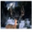

In [189]:
transforms.ToPILImage()(samples[5])